In [17]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
import sklearn
from sklearn.metrics import roc_curve

In [12]:
# load load_breast_cancer

In [13]:
cancer=sklearn.datasets.load_breast_cancer()
x = np.where(cancer["feature_names"] == "mean area")[0][0]
y = np.where(cancer["feature_names"] == "mean concave points")[0][0]

In [ ]:
# normalize (use StandardScaler if you wish)

In [15]:
X0 = np.asarray([cancer["data"][:,x], cancer["data"][:,y], np.ones(cancer["data"].shape[0])]).T
y0 = (1.*(cancer["target"]==np.where(cancer["target_names"] == "malignant")[0][0]) +
     -1.*(cancer["target"]==np.where(cancer["target_names"] == "benign")[0][0]))

X,y = X0.copy()[:,:-1], y0.copy() 

norm = StandardScaler()
norm.fit(X)

StandardScaler()

In [ ]:
# partition with test size 0.3

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
# fit logistic regression and draw ROC curve
# use predict_log_proba()

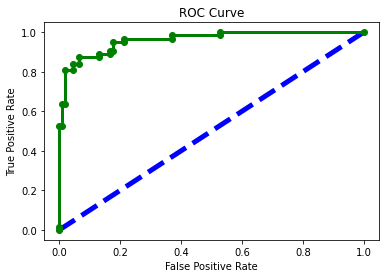

In [29]:
# log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)
ns_probs =[0 for _ in range(len(y_test))]

lr_probs = log_reg.predict_log_proba(x_test)
lr_probs= lr_probs[:,1]


ns_fpr, ns_tpr, _ = roc_curve(y_test,ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.title("ROC Curve")
plt.plot(ns_fpr,ns_tpr,'b--',linewidth=5)
plt.plot(lr_fpr,lr_tpr, marker='o',c="g",linewidth=3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# What happens to the "score" when C = 1, 1/10, 150, 100, 1000?

In [38]:
log_reg.score(x_test,y_test)

0.9005847953216374